In [7]:
import requests
import json
from contextlib import closing
# make base URL and dictionary of get request key/values
url = "https://content.guardianapis.com/search"
payload = {'api-key': "6ff8fcd2-050d-4801-a29f-848c8b750b6e", 'q':'parliament', 'show-blocks':'body', 
           'page-size': 200, 'show-tags': 'contributor'} # key/values for get request (look up in api, there are lots)

# Perform the actual request
with closing(requests.get(url,params=payload)) as r:
    articles = r.json()
#     print(articles)
summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results'] if x['tags']]
# print(summaries)
# summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results']]
# print(len(summaries))
# # print(len([word for document in summaries for word in summaries[0].split()]))
words = [word for document in summaries for word in document.split()]
print(words)
print(len(words))

['An', 'ally', 'of', 'the', 'former', 'Italian', 'prime', 'minister', 'Silvio', 'Berlusconi', 'has', 'been', 'elected', 'president', 'of', 'the', 'European', 'parliament', 'after', 'a', 'deal', 'was', 'struck', 'between', 'two', 'of', 'the', 'institution’s', 'largest', 'political', 'groups,', 'consolidating', 'a', 'conservative', 'grip', 'on', 'key', 'European', 'Union', 'institutions.', 'Antonio', 'Tajani,', 'who', 'has', 'been', 'elected', 'as', 'an', 'MEP', 'four', 'times', 'and', 'was', 'previously', 'a', 'vice-president', 'of', 'the', 'European', 'parliament,', 'beat', 'the', 'centre-left', 'leader', 'and', 'fellow', 'Italian', 'Gianni', 'Pittella', 'by', '351', 'votes', 'to', '282', 'in', 'a', 'rare', 'fourth-round', 'runoff,', 'contrary', 'to', 'past', 'appointments', 'decided', 'by', 'mainstream', 'parties', 'before', 'the', 'voting.', 'Tajani’s', 'victory', 'followed', 'a', 'pact', 'between', 'his', 'centre-right', 'group', 'and', 'the', 'liberals,', 'led', 'by', 'the', 'Brexi

In [11]:
doc_lengths = []
for document in summaries:
    length = 0
    for word in document.split():
        length += 1
    doc_lengths.append(length)
doc_lengths

[610,
 948,
 640,
 315,
 496,
 521,
 1043,
 390,
 333,
 703,
 816,
 455,
 460,
 620,
 775,
 129,
 1272,
 716,
 733,
 913,
 698,
 455,
 555,
 967,
 953,
 724,
 301,
 388,
 489,
 394,
 810,
 716,
 1072,
 182,
 815,
 780,
 735,
 782,
 834,
 926,
 1484,
 1080,
 799,
 1057,
 1311,
 394,
 725,
 866,
 758,
 1105,
 1010,
 708,
 866,
 852,
 313,
 1295,
 57,
 866,
 273,
 380,
 410,
 478,
 893,
 405,
 204,
 859,
 401,
 645,
 605,
 390,
 670,
 545,
 625,
 769,
 805,
 549,
 255,
 765,
 1112,
 2143,
 545,
 671,
 893,
 355,
 1302,
 510,
 312,
 875,
 227,
 946,
 681,
 717,
 766,
 721,
 679,
 909,
 481,
 428,
 1101,
 418,
 908,
 1092,
 1048,
 1650,
 887,
 301,
 748,
 1071,
 0,
 861,
 667,
 848,
 0,
 855,
 545,
 1093,
 699,
 859,
 891,
 555,
 658,
 745,
 853,
 500,
 1289,
 785,
 769,
 1307,
 526,
 632,
 886,
 641,
 652,
 691,
 572,
 774,
 437,
 788,
 517,
 806,
 695,
 363,
 775,
 797,
 424,
 601,
 1388,
 1844,
 505,
 788,
 187,
 649,
 919,
 458,
 548,
 652,
 755,
 1275,
 564,
 588,
 693,
 297,
 776,
 0,

In [12]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

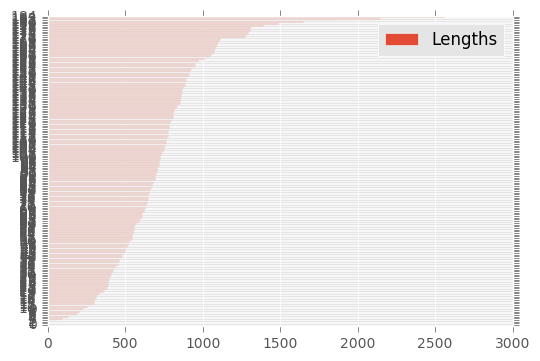

In [21]:

doc_lengths.sort()
df = pd.DataFrame({'Lengths': doc_lengths})
plt.style.use('ggplot')
ax = df.plot(kind="barh")

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer() # an object capable of counting words in a document!

In [29]:

# tfidf_vect = TfidfVectorizer(stop_words=stopwords,
#                              max_df=0.01,
#                              min_df=4)
# filtered_words = tfidf_vect.fit_transform(words) 
# vec=filtered_words.max(axis=0)
# df = pd.DataFrame(data=vec.toarray(),columns=tfidf_vect.get_feature_names())
# df.max().sort_values()[-10:]

establish        1.0
established      1.0
establishment    1.0
estate           1.0
estimated        1.0
ethics           1.0
ethnic           1.0
eu               1.0
europe           1.0
zones            1.0
dtype: float64

[10 points] Give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Why is this data important and how will you know if you have gathered useful knowledge from the dataset? Be specific and use your own words to describe the aspects of the data.
Data Encoding
Omar

[10 points] Read in your document data as strings.
Rupal


[15 points] Verify data quality: remove words from the vocabulary that are not relevant or that you think should not be included. Alternatively, choose a specific vocabulary to choose for your data. 
Omar

In [24]:
# combined stop words from scikit-Learn's original source and 2 others, for 617 stop words
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/feature_extraction/stop_words.py
# https://sites.google.com/site/kevinbouge/stopwords-lists
# http://algs4.cs.princeton.edu/35applications/stopwords.txt
with open("combined_stop_words.txt") as textfile:
    stopwords = textfile.readlines()
    stopwords = [word.strip() for word in stopwords]

[10 points] Convert the data from raw text into a sparse encoded bag-of-words representation.   
Rupal

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bag = count_vect.fit_transform(words)
print(bag.shape)
#print(count_vect.vocabulary_)

(132278, 11718)


In [54]:
import matplotlib.pyplot as plt
print(bag[0])
plt.style.use('ggplot')
#ax = bag.plot(kind="barh")

  (0, 763)	1


In [3]:
print(type(count_vect.vocabulary_))
doc_lengths.sort()
df = pd.DataFrame.from_dict(count_vect.vocabulary_)
#df = pd.DataFrame(count_vect.vocabulary_)
plt.style.use('ggplot')
ax = df.plot(kind="barh")

NameError: name 'count_vect' is not defined

[10 points] Convert the data into a sparse encoded tf-idf representation.
Omar

[20 points] Visualize statistical summaries of the text data such as word frequencies, document lengths, most relevant words, vocabulary size, etc. Choose visualizations that you think summarize your data best.
Rupal : word freq, doc lengths
and Omar: most relevant words, vocab size

In [10]:
import pandas as pd 

pd.options.display.max_columns = 999
df = pd.DataFrame(data=bag.toarray(),columns=count_vect.get_feature_names())
df

,000,012,04,074,10,100,100g,100ml,101,102,107m,10am,10b,10km,10pm,11,110,112,114,116,11bn,11g,11th,12,120,121,122,128,1297,12pm,13,130,13bn,13th,14,140,15,150,152,153,154,158m,15m,16,160m,161,163,164,1651,166,1666,167,1670,1688,17,170,173,1776,17th,18,1800,1800respect,180m,183,1832,1834,1847,189,18c,18th,19,1901,1903,191,1912,1914,1915,1916,1920,1930s,1932,1940,1945,1948,1950s,1952,1954,1958,1959,196,1960,1960s,1961,1962,1964,1965,1967,1968,1970,1970s,1971,1972,1974,1975,1977,1978,1979,1980s,1981,1982,1985,1986,1988,199,1990,1990s,1991,1994,1996,1997,1998,1999,19th,1bn,1m,1pm,20,200,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2022,2028,2029,2030,2030s,2032,2040,2080,20bn,20th,21,213,217,219,21st,22,220bn,228,23,236,23rd,24,24m,25,250,250bn,25bn,25s,25th,26,265m,27,2703,28,281,282,285,289,28bn,29,290,29bn,2bn,2c,2gb,30,300,300m,301,30am,30pm,31,315,32,321bn,32nd,33,333,337,338,34,35,350m,351,35bn,36,360,360bn,362,36bn,37,372,38,39,390,3aw,3bn,3g,3m,40,400,41,42,43,430,432,43rd,44,440,441,44th,45,450,452,45bn,45th,46,47,471,475,48,49,493,49am,49m,4bn,50,500,5000,500m,50m,50s,51,52,525m,52bn,53,530m,533,54,540m,546,55,550,55zf,56,56bn,57,58,588,59,592,5bn,5c,5m,60,600,60bn,60m,61,62,620,63,64,65,650,652,65s,66,662,664,66bn,68,69,6bn,6g,6m,6pm,70,700,708,71,72,73,732,737,75,750,751,76,765m,768,77,77bn,78,79,7bn,7m,7pm,7up,80,800,80m,80s,818,82,84,85,850,857,86m,87m,88,89,8am,8bn,90,900,903,90s,91,92,93,95,96,99,992,9bn,9m,aback,abandon,abandoned,abandoning,abbotsbury,abbott,abc,abc24,abcc,abdel,abdul,aberavon,aberdeen,aberdeenshire,abetz,abide,ability,abject,able,abnormal,abnormalities,abnormality,abolish,aboriginal,abortion,abortions,abortive,about,above,abrasive,abroad,abromavičius,abseiled,abseilers,absence,absences,absent,absentee,absolute,absolutely,absorbed,abstain,abstained,abstentions,abstract,absurd,absurdity,abuse,abused,abuses,abusing,academia,academic,academics,accelerate,acceleration,accept,acceptable,acceptance,accepted,accepting,accepts,access,accessed,accession,accident,accidentally,acclaimed,accommodate,accommodating,accommodation,accommodations,accompanied,accomplices,accomplished,accord,accordance,according,accordingly,account,accountability,accountable,accounting,accounts,accreditation,accredited,accrual,accurate,accurately,accusations,accuse,accused,accusing,accustomed,acerbic,acharged,achieve,achieved,achievement,achievements,achieves,achieving,acknowledge,acknowledged,acknowledgement,acknowledging,acquainted,acquire,acquired,acquisition,acquitted,acres,acropolis,across,act,acted,acting,action,actions,activate,activating,active,actively,activism,activist,activists,activities,activity,actor,acts,actu,actual,actually,acute,ad,adam,adamant,adams,adapt,add,added,...,viability,vic,vice,vicious,vicky,victim,victimise,victims,victoria,victorian,victory,vida,video,videolink,vienna,vietnam,vietnamese,view,viewed,views,vigour,viii,viktor,vile,vilification,villages,villas,villiers,vince,vincent,vincenzo,vindictiveness,vintage,violated,violation,violations,violence,violent,virginia,virpal,virtually,virtue,virtues,virus,visa,visas,visible,visibly,vision,visionaries,visions,visit,visitation,visited,visiting,visitor,visitors,visits,vista,vital,vitriolic,vituperation,viviane,vladimir,vocal,vocational,voice,voiced,voices,voicing,void,volatile,volley,volleyball,volodymyr,volume,voluntary,volunteer,volunteers,vote,voted,voter,voters,votes,voting,vowed,vowing,vows,voytsitska,vulgarity,vulnerability,vulnerable,vw,věra,wa,waca,wacking,wage,wages,wai,waikato,wait,waited,waiting,waivers,wake,waking,waleed,wales,walgett,walk,walked,walker,walking,walkout,walks,wall,wallonia,wallonian,walloon,walls,walter,walthamstow,wang,want,wanted,wanting,wants,war,ware,warehouse,warfare,warlpiri,warmed,warming,warmth,warn,warned,warning,warnings,warplanes,warrant,warrants,warren,warring,warringah,wars,warsi,wary,was,wash,washington,washy,wasn,waste,wasted,waszczykowski,wat,watch,watchdog

In [11]:
df.sum()

000               54
012                1
04                 1
074                1
10                63
100               11
100g               1
100ml              1
101                1
102                1
107m               2
10am               1
10b                1
10km               1
10pm               1
11                22
110                2
112                4
114                1
116                1
11bn               1
11g                1
11th               2
12                20
120                1
121                1
122                2
128                1
1297               1
12pm               1
                  ..
yougov             2
young             28
younger            4
youngspiration     2
your              47
yours              2
yourself           1
yourselves         1
youse              1
youth              1
youtube            1
yudhoyono          1
yvette             1
zahalka            1
zahawi             1
zealand            7
zealots      

In [9]:
df.sum().sort_values()[-10:]

it      1285
for     1295
on      1324
is      1465
that    1776
in      2623
and     2916
of      3799
to      4443
the     9834
dtype: int64

[15 points] For each target class, visualize the most common relevant words and word frequencies. Are there any prevalent differences between your target classes? 
Rupal

  Exceptional Work (10 points total)
You have free reign to provide any additional analyses. 
One idea: create a word cloud of the most commonly used relevant words in your data. 